# Outlier Analysis

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_excel(r'C:\Users\user\Desktop\internship-project\dataset\Concrete_Data.xls')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [5]:
data = data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"furnace_slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"fly_ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"super_plasticizer",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"})

In [6]:
import seaborn as sns

# Boxplots

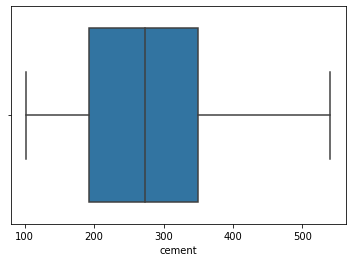

In [7]:
sns.boxplot(x=data['cement'])

    There are no outliers in the 'cement' column

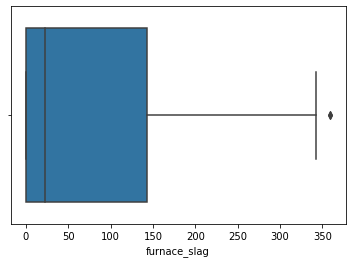

In [8]:
sns.boxplot(x=data['furnace_slag'])

    only one outlier is found in the 'furnace_slag' column

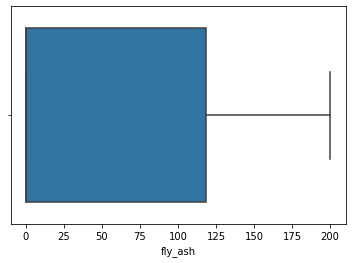

In [9]:
sns.boxplot(x=data['fly_ash'])

    No outliers are present in 'fly_ash' column

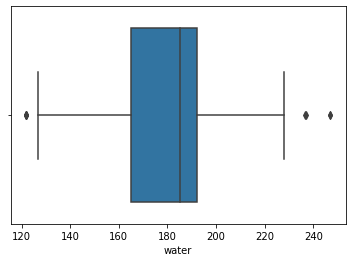

In [10]:
sns.boxplot(x=data['water'])

    There are three outliers in the 'water' column

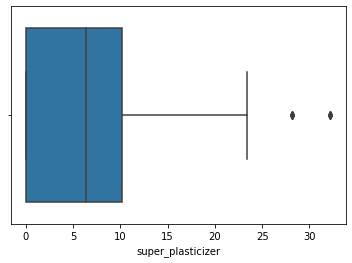

In [11]:
sns.boxplot(x=data['super_plasticizer'])

    There are two outliers in the 'super_plasticizer' column

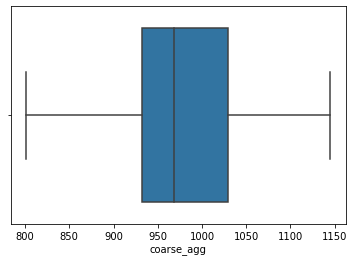

In [12]:
sns.boxplot(x=data['coarse_agg'])

    There are no outliers in the 'coarse_agg' column

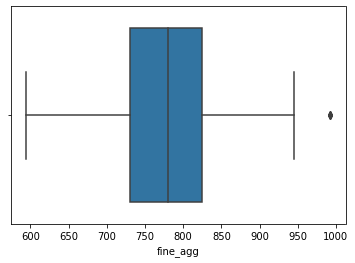

In [13]:
sns.boxplot(x=data['fine_agg'])

    There is one outlier in the 'fine_agg' column

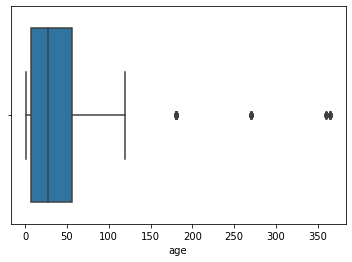

In [14]:
sns.boxplot(x=data['age'])

    'age' column has four outliers

# outlier treatment

In [15]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

[[2.47791782 0.85688631 0.84713204 ... 1.21765845 0.27973311 2.64519215]
 [2.47791782 0.85688631 0.84713204 ... 1.21765845 0.27973311 1.5612771 ]
 [0.49144303 0.79553263 0.84713204 ... 2.24091255 3.55306569 0.26660766]
 ...
 [1.2700575  0.75958527 0.85066095 ... 0.08012724 0.27973311 0.7259282 ]
 [1.16857975 1.3080724  0.84713204 ... 0.19118775 0.27973311 0.18264932]
 [0.19401043 0.30850389 0.37696733 ... 0.15072887 0.27973311 0.20461667]]


In [16]:
print(np.where(z > 3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


# Removing outliers

In [17]:
z_scores = stats.zscore(data)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
dataset = data[filtered_entries]




In [18]:
dataset

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.074244
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.021684
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.326932
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28,47.813782


In [1]:
1030-981

49


    49 columns having outliers were removed and 'dataset' contain outlier free data